# Importing libraries

In [123]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score

# Loading train and test data

In [124]:
msg_train = pd.read_csv('train.csv')
msg_train

,label,message,length
0,spam,"['sexy', 'st', 'george', 'day', 'pic', 'jordan...",16
1,ham,"['armand', 'say', 'get', 'as', 'epsilon']",5
2,ham,"['lol', 'i', 'hot', 'air', 'balloon']",5
3,ham,"['you', 'know', 'wot', 'people', 'wear', 't', ...",14
4,ham,"['good', 'morning', 'love', 'i', 'go', 'sleep'...",21
...,...,...,...
4454,ham,"['hi', 'wlcome', 'back', 'wonder', 'got', 'eat...",10
4455,spam,"['ree', 'entry', 'weekly', 'comp', 'chance', '...",18
4456,ham,"['oh', 'fuck', 'juswoke', 'up', 'in', 'a', 'be...",22
4457,ham,"['not', 'much', 'no', 'fights', 'it', 'was', '...",9


In [125]:
msg_test = pd.read_csv('test.csv')
msg_test

,label,message,length
0,ham,"['you', 'still', 'coming', 'tonight']",4
1,ham,"['hey', 'babe', 'far', 'spk', 'at', 'da', 'mo'...",30
2,ham,"['ya', 'even', 'cooky', 'jelly']",4
3,ham,"['sorry', 'gone', 'place', 'tomorrow', 'really...",6
4,ham,"['when', 'going', 'ride', 'bike']",4
...,...,...,...
1110,ham,"['my', 'supervisor', 'find', 'one', 'lor', 'th...",15
1111,spam,"['bored', 'housewife', 'chat', 'n', 'date', 'r...",7
1112,ham,"['rose', 'red', 'red', 'blood', 'blood', 'hear...",36
1113,ham,"['also', 'remember', 'bead', 'come', 'ever']",5


In [126]:
models, f1 = ['Naive Bayes', 'Logistic Regression', 'Support Vector Machines'], []

# 1. Naive Bayes Classifier

In [127]:
pipeline_nb = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [128]:
scores = cross_val_score(pipeline_nb,  # steps to convert raw messages into models
                         msg_train['message'],  # training data
                         msg_train['label'],  # training labels
                         cv=10,  # split data randomly into 10 parts: 9 for training, 1 for scoring
                         scoring='accuracy',  # which scoring metric?
                         n_jobs=-1,  # -1 = use all cores = faster
                         )
scores

array([0.95515695, 0.97309417, 0.9573991 , 0.97309417, 0.96412556,
       0.96860987, 0.94843049, 0.97309417, 0.95515695, 0.9505618 ])

In [129]:
scores.mean(), scores.std()

(np.float64(0.9618723232730387), np.float64(0.009203662586574195))

## Fitting the model

In [130]:
pipeline_nb.fit(msg_train['message'],msg_train['label'])

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

## Performance on Train Data

In [131]:
predictions = pipeline_nb.predict(msg_train['message'])
accuracy_score(msg_train['label'], predictions)

0.9739851984749944

In [132]:
f1_score(msg_train['label'], predictions, pos_label='spam')

0.8901515151515151

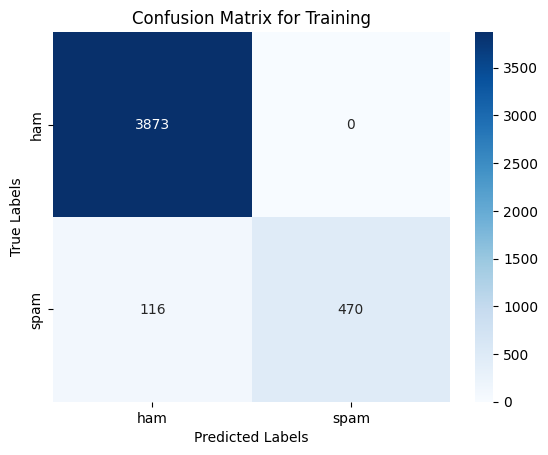

In [133]:
cm = confusion_matrix(msg_train['label'], predictions)
# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['ham', 'spam'], yticklabels=['ham','spam'])
plt.title('Confusion Matrix for Training')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [134]:
print(classification_report(msg_train['label'], predictions))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.99      3873
        spam       1.00      0.80      0.89       586

    accuracy                           0.97      4459
   macro avg       0.99      0.90      0.94      4459
weighted avg       0.97      0.97      0.97      4459



## Performance on Test Data

In [135]:
predictions = pipeline_nb.predict(msg_test['message'])
accuracy_score(msg_test['label'], predictions)

0.9668161434977578

In [136]:
f = f1_score(msg_test['label'], predictions, pos_label='spam')
f

0.8701754385964913

In [137]:
f1.append(f)

In [138]:
cm = confusion_matrix(msg_test['label'], predictions)

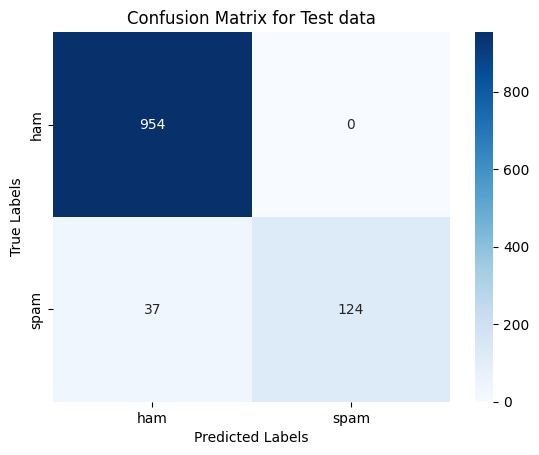

In [139]:
# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['ham', 'spam'], yticklabels=['ham','spam'])
plt.title('Confusion Matrix for Test data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [140]:
print(classification_report(msg_test['label'], predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       954
        spam       1.00      0.77      0.87       161

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.96      1115



# 2. Logistic Regression

In [141]:
LogisticRegression().get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [142]:
pipeline_LR = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', LogisticRegression())  # train on TF-IDF vectors w/ logistic regression
])

In [143]:
scores = cross_val_score(pipeline_LR,  # steps to convert raw messages into models
                         msg_train['message'],  # training data
                         msg_train['label'],  # training labels
                         cv=10,  # split data randomly into 10 parts: 9 for training, 1 for scoring
                         scoring='accuracy',  # which scoring metric?
                         n_jobs=-1,  # -1 = use all cores = faster
                         )
scores

array([0.9529148 , 0.97085202, 0.95067265, 0.96860987, 0.96636771,
       0.95964126, 0.93721973, 0.96412556, 0.95964126, 0.94831461])

In [144]:
scores.mean(), scores.std()

(np.float64(0.9578359449790901), np.float64(0.009977869737907773))

## Fitting the model

In [145]:
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l2'],
    'classifier__max_iter': [100]
}

LR_Classifier = GridSearchCV(pipeline_LR, param_grid, cv=5, scoring='f1_micro', verbose=3)
LR_Classifier.fit(msg_train['message'], msg_train['label'])

print("Best parameters:", LR_Classifier.best_params_)
print("Best score:", LR_Classifier.best_score_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END classifier__C=0.01, classifier__max_iter=100, classifier__penalty=l2;, score=0.868 total time=   0.1s
[CV 2/5] END classifier__C=0.01, classifier__max_iter=100, classifier__penalty=l2;, score=0.869 total time=   0.1s
[CV 3/5] END classifier__C=0.01, classifier__max_iter=100, classifier__penalty=l2;, score=0.869 total time=   0.1s
[CV 4/5] END classifier__C=0.01, classifier__max_iter=100, classifier__penalty=l2;, score=0.869 total time=   0.1s
[CV 5/5] END classifier__C=0.01, classifier__max_iter=100, classifier__penalty=l2;, score=0.869 total time=   0.1s
[CV 1/5] END classifier__C=0.1, classifier__max_iter=100, classifier__penalty=l2;, score=0.868 total time=   0.1s
[CV 2/5] END classifier__C=0.1, classifier__max_iter=100, classifier__penalty=l2;, score=0.871 total time=   0.1s
[CV 3/5] END classifier__C=0.1, classifier__max_iter=100, classifier__penalty=l2;, score=0.869 total time=   0.1s
[CV 4/5] END classifier

## Performance onf Train Data

In [146]:
predictions = LR_Classifier.predict(msg_train['message'])
accuracy_score(msg_train['label'],predictions)

1.0

In [147]:
f1_score(msg_train['label'], predictions, pos_label='spam')

1.0

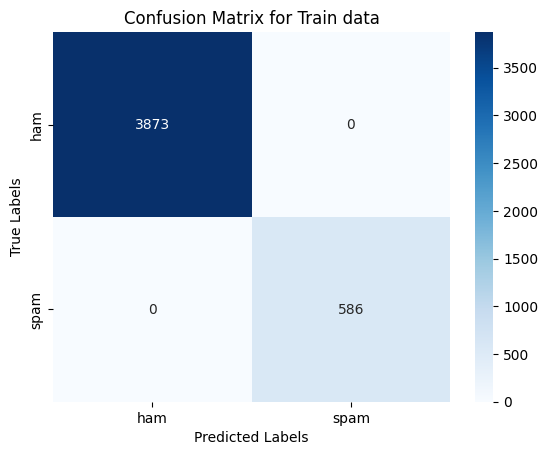

In [148]:
cm = confusion_matrix(msg_train['label'], predictions)
# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['ham', 'spam'], yticklabels=['ham','spam'])
plt.title('Confusion Matrix for Train data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [149]:
print(classification_report(msg_train['label'],predictions,digits=4))

              precision    recall  f1-score   support

         ham     1.0000    1.0000    1.0000      3873
        spam     1.0000    1.0000    1.0000       586

    accuracy                         1.0000      4459
   macro avg     1.0000    1.0000    1.0000      4459
weighted avg     1.0000    1.0000    1.0000      4459



## Performance on Test Data

In [150]:
predictions = LR_Classifier.predict(msg_test['message'])
accuracy_score(msg_test['label'], predictions)

0.9838565022421525

In [151]:
f = f1_score(msg_test['label'], predictions, pos_label='spam')
f

0.9419354838709677

In [152]:
f1.append(f)

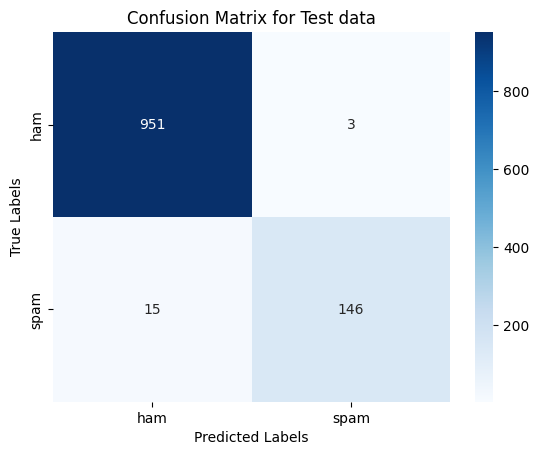

In [153]:
cm = confusion_matrix(msg_test['label'], predictions)
# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['ham', 'spam'], yticklabels=['ham','spam'])
plt.title('Confusion Matrix for Test data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [154]:
print(classification_report(msg_test['label'], predictions,digits=4))

              precision    recall  f1-score   support

         ham     0.9845    0.9969    0.9906       954
        spam     0.9799    0.9068    0.9419       161

    accuracy                         0.9839      1115
   macro avg     0.9822    0.9518    0.9663      1115
weighted avg     0.9838    0.9839    0.9836      1115



# 3. Support Vector Machines

In [155]:
SVC().get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [156]:
pipeline_svm = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', SVC())  # train on TF-IDF vectors w/ SVM classifier
])

In [157]:
scores = cross_val_score(pipeline_svm,  # steps to convert raw messages into models
                         msg_train['message'],  # training data
                         msg_train['label'],  # training labels
                         cv=10,  # split data randomly into 10 parts: 9 for training, 1 for scoring
                         scoring='accuracy',  # which scoring metric?
                         n_jobs=-1,  # -1 = use all cores = faster
                         )
scores

array([0.97982063, 0.98430493, 0.97085202, 0.9955157 , 0.97982063,
       0.97757848, 0.95964126, 0.97982063, 0.97757848, 0.97303371])

In [158]:
scores.mean(), scores.std()

(np.float64(0.9777966443291177), np.float64(0.008770626197462042))

## Fitting the model

In [159]:
param_grid = {
    'classifier__C': [1, 10, 5],
    'classifier__kernel': ['linear', 'rbf', 'poly'],
    'classifier__gamma': ['scale', 'auto']
}

svm_classifier = GridSearchCV(pipeline_svm, param_grid, cv=5, scoring='f1_micro',verbose=3)
svm_classifier.fit(msg_train['message'], msg_train['label'])

print("Best parameters:", svm_classifier.best_params_)
print("Best score:", svm_classifier.best_score_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END classifier__C=1, classifier__gamma=scale, classifier__kernel=linear;, score=0.985 total time=   0.6s
[CV 2/5] END classifier__C=1, classifier__gamma=scale, classifier__kernel=linear;, score=0.985 total time=   0.6s
[CV 3/5] END classifier__C=1, classifier__gamma=scale, classifier__kernel=linear;, score=0.980 total time=   0.5s
[CV 4/5] END classifier__C=1, classifier__gamma=scale, classifier__kernel=linear;, score=0.974 total time=   0.5s
[CV 5/5] END classifier__C=1, classifier__gamma=scale, classifier__kernel=linear;, score=0.978 total time=   0.3s
[CV 1/5] END classifier__C=1, classifier__gamma=scale, classifier__kernel=rbf;, score=0.981 total time=   0.9s
[CV 2/5] END classifier__C=1, classifier__gamma=scale, classifier__kernel=rbf;, score=0.981 total time=   0.9s
[CV 3/5] END classifier__C=1, classifier__gamma=scale, classifier__kernel=rbf;, score=0.975 total time=   0.9s
[CV 4/5] END classifier__C=1, classi

## Performance on Train Data

In [160]:
predictions = svm_classifier.predict(msg_train['message'])
accuracy_score(msg_train['label'], predictions)

0.999775734469612

In [161]:
f1_score(msg_train['label'], predictions, pos_label='spam')

0.9991460290350128

In [162]:
f1.append(f)

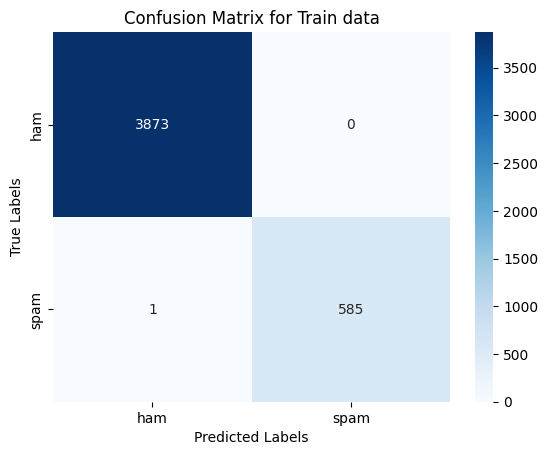

In [163]:
cm = confusion_matrix(msg_train['label'], predictions)
# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['ham', 'spam'], yticklabels=['ham','spam'])
plt.title('Confusion Matrix for Train data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [164]:
print(classification_report(msg_train['label'], predictions, digits=4))

              precision    recall  f1-score   support

         ham     0.9997    1.0000    0.9999      3873
        spam     1.0000    0.9983    0.9991       586

    accuracy                         0.9998      4459
   macro avg     0.9999    0.9991    0.9995      4459
weighted avg     0.9998    0.9998    0.9998      4459



## Performance on Test Data

In [165]:
predictions = svm_classifier.predict(msg_test['message'])
accuracy_score(msg_test['label'], predictions)

0.9820627802690582

In [170]:
f = f1_score(msg_test['label'], predictions, pos_label='spam')
f

0.9354838709677419

In [ ]:
f1.append(f)

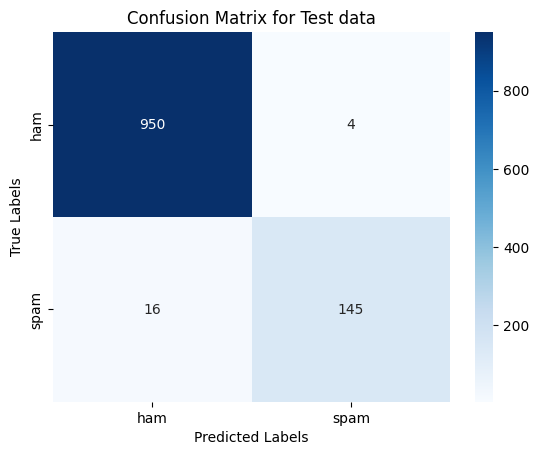

In [167]:
cm = confusion_matrix(msg_test['label'], predictions)
# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['ham', 'spam'], yticklabels=['ham','spam'])
plt.title('Confusion Matrix for Test data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [168]:
print(classification_report(msg_test['label'], predictions,digits=4))

              precision    recall  f1-score   support

         ham     0.9834    0.9958    0.9896       954
        spam     0.9732    0.9006    0.9355       161

    accuracy                         0.9821      1115
   macro avg     0.9783    0.9482    0.9625      1115
weighted avg     0.9820    0.9821    0.9818      1115



# Benchmarking the performance

In [172]:
pd.DataFrame({'Model':models, 'F1 Score':f1})

,Model,F1 Score
0,Naive Bayes,0.870175
1,Logistic Regression,0.941935
2,Support Vector Machines,0.935484
